<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/Lesson%201.%20MLP/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9E%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%9E%D1%88%D0%B8%D0%B1%D0%BA%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D0%A1%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритм Обратного Распространения Ошибки для Нейронной Сети

Рассмотрим простую нейронную сеть с двумя входами, одним скрытым слоем из двух нейронов и одним выходом. Мы будем подробно разбирать алгоритм обратного распространения ошибки (backpropagation) для этой сети.



### 1. Архитектура Нейросети

Нейросеть имеет следующую структуру:

- **Входной слой**: два нейрона $x_1$ и $x_2$.
- **Скрытый слой**: два нейрона $h_1$ и $h_2$, каждый из которых применяет активационную функцию.
- **Выходной слой**: один нейрон $y$.

Каждый нейрон в скрытом слое и на выходе связан с нейронами предыдущего слоя через веса, которые будем обозначать как $w$. На выходе вычисляется ошибка, которая затем используется для обновления весов с помощью алгоритма обратного распространения.



### 2. Прямой Проход (Forward Pass)

На этом этапе данные проходят через нейросеть, и вычисляется итоговый выход $y$.

- На вход подаются значения $x_1$ и $x_2$.
- Каждый нейрон в скрытом слое получает взвешенную сумму входов и применяет активационную функцию. Предположим, что используется сигмоида:

$$
  h_1 = \sigma(w_{11} x_1 + w_{12} x_2 + b_1)
$$
$$
  h_2 = \sigma(w_{21} x_1 + w_{22} x_2 + b_2)
$$

  где $w_{ij}$ — это веса, $b_1$ и $b_2$ — смещения (bias), а $\sigma(z)$ — сигмоида:

$$
  \sigma(z) = \frac{1}{1 + e^{-z}}
$$

- Выходной нейрон вычисляет взвешенную сумму от скрытых нейронов и применяет активационную функцию (например, также сигмоида):

$$
  y = \sigma(w_{31} h_1 + w_{32} h_2 + b_3)
$$



### 3. Ошибка (Error)

После того как выход нейросети $y$ получен, вычисляется ошибка. Ошибка определяется как разница между предсказанным значением $y$ и истинным значением $y_{\text{true}}$:

$$
E = \frac{1}{2} (y - y_{\text{true}})^2
$$

Фактор $\frac{1}{2}$ используется для упрощения производных в процессе оптимизации.



### 4. Обратное Распространение (Backpropagation)

Процесс обратного распространения ошибки включает в себя вычисление производных ошибки по каждому из весов в сети, чтобы обновить их с использованием градиентного спуска.

#### Шаг 1: Ошибка на Выходе

Для вычисления градиента ошибки по весу $w_{31}$ (например, для первого веса выходного нейрона) необходимо найти частную производную ошибки $E$ по этому весу. Используем цепное правило:

$$
\frac{\partial E}{\partial w_{31}} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial w_{31}}
$$

- Производная ошибки по выходу $y$:

$$
\frac{\partial E}{\partial y} = (y - y_{\text{true}})
$$

- Производная выхода $y$ по весу $w_{31}$:

$$
\frac{\partial y}{\partial w_{31}} = h_1 \cdot \sigma'(z_3) = h_1 \cdot y \cdot (1 - y)
$$

Здесь $z_3$ — это взвешенная сумма входных данных для выходного нейрона, которая рассчитывается как:

$$
z_3 = w_{31} h_1 + w_{32} h_2 + b_3
$$

Производная сигмоиды по $z_3$ равна:

$$
\sigma'(z_3) = \sigma(z_3) \cdot (1 - \sigma(z_3)) = y \cdot (1 - y)
$$

Таким образом, градиент по $w_{31}$:

$$
\frac{\partial E}{\partial w_{31}} = (y - y_{\text{true}}) \cdot h_1 \cdot y \cdot (1 - y)
$$



#### Шаг 2: Ошибка на Скрытых Нейронах

Теперь необходимо вычислить ошибку для скрытых нейронов. Например, для $h_1$:

$$
\frac{\partial E}{\partial h_1} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial h_1}
$$

- Производная выхода $y$ по скрытому нейрону $h_1$:

$$
\frac{\partial y}{\partial h_1} = w_{31} \cdot \sigma'(z_3) = w_{31} \cdot y \cdot (1 - y)
$$

Итак, градиент по $h_1$:

$$
\frac{\partial E}{\partial h_1} = (y - y_{\text{true}}) \cdot w_{31} \cdot y \cdot (1 - y)
$$

Теперь необходимо передать эту ошибку назад к весам, связанным с $h_1$. Например, для веса $w_{11}$:

$$
\frac{\partial E}{\partial w_{11}} = \frac{\partial E}{\partial h_1} \cdot \frac{\partial h_1}{\partial w_{11}}
$$

- Производная скрытого нейрона $h_1$ по весу $w_{11}$:

$$
\frac{\partial h_1}{\partial w_{11}} = x_1 \cdot \sigma'(z_1) = x_1 \cdot h_1 \cdot (1 - h_1)
$$

Таким образом, градиент по $w_{11}$:

$$
\frac{\partial E}{\partial w_{11}} = (y - y_{\text{true}}) \cdot w_{31} \cdot y \cdot (1 - y) \cdot x_1 \cdot h_1 \cdot (1 - h_1)
$$



#### Шаг 3: Обновление Весов

После того как все градиенты вычислены, можно обновить веса с использованием градиентного спуска. Например, для веса $w_{11}$ обновление будет выглядеть следующим образом:

$$
w_{11} \leftarrow w_{11} - \eta \cdot \frac{\partial E}{\partial w_{11}}
$$

где $\eta$ — это скорость обучения.

Этот процесс повторяется для всех весов в сети, и в результате нейросеть начинает лучше предсказывать выходные значения.



Таким образом, алгоритм обратного распространения ошибки для нейросетей с двумя входами, одним скрытым слоем и одним выходом заключается в вычислении градиентов ошибки по всем весам и их обновлении с помощью градиентного спуска. Важно, что шаги, описанные выше, применяются не только к конкретным весам, но и могут быть масштабированы для более сложных сетей.

В процессе обратного распространения важным моментом является вычисление производных ошибки по взвешенным суммам на каждом уровне сети, включая $z_3$ для выходного нейрона. С использованием этих производных мы можем точно настроить веса нейросети, что позволяет улучшить ее точность в предсказаниях.


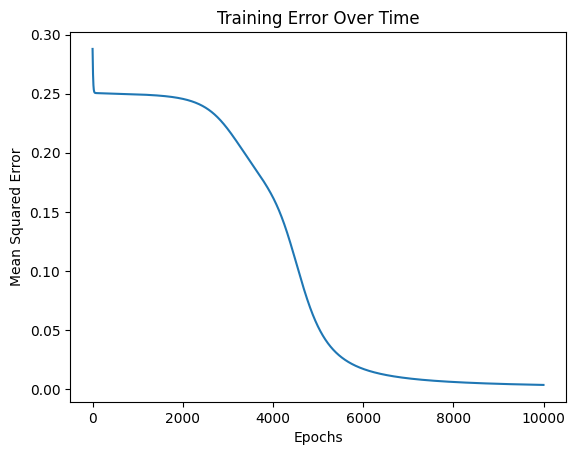

Final weights (input -> hidden):
[[3.6991303  5.699086  ]
 [3.70579679 5.73069504]]
Final weights (hidden -> output):
[[-8.02663537]
 [ 7.42116082]]
Final output after training:
[[0.06029012]
 [0.94447222]
 [0.944367  ]
 [0.05997169]]
Predictions for new data:
[[0.06028403]
 [0.9444784 ]
 [0.9443732 ]
 [0.05996465]
 [0.94442751]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоида и её производная
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Параметры нейронной сети
input_size = 2  # Два входа
hidden_size = 2  # Два нейрона в скрытом слое
output_size = 1  # Один выходной нейрон

# Инициализация случайных весов и смещений
np.random.seed(42)
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

bias_hidden = np.random.rand(1, hidden_size)
bias_output = np.random.rand(1, output_size)

# Обучающие данные (пример)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Входные данные
y = np.array([[0], [1], [1], [0]])  # Целевые значения (XOR задача)

# Гиперпараметры
learning_rate = 0.1
epochs = 10000

# Массив для визуализации ошибок на каждой итерации
errors = []

# Обучение
for epoch in range(epochs):
    # Прямой проход
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = sigmoid(output_input)

    # Вычисление ошибки
    error = y - output
    errors.append(np.mean(np.square(error)))  # Среднеквадратичная ошибка

    # Обратное распространение
    output_delta = error * sigmoid_derivative(output)
    hidden_delta = output_delta.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_output)

    # Обновление весов и смещений
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

# Визуализация ошибок
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Over Time')
plt.show()

# Печать результатов
print("Final weights (input -> hidden):")
print(weights_input_hidden)
print("Final weights (hidden -> output):")
print(weights_hidden_output)
print("Final output after training:")
print(output)


# Новые данные для тестирования
new_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [0.5, 0.5]])

# Прямой проход через сеть
hidden_input_test = np.dot(new_data, weights_input_hidden) + bias_hidden
hidden_output_test = sigmoid(hidden_input_test)

output_input_test = np.dot(hidden_output_test, weights_hidden_output) + bias_output
output_test = sigmoid(output_input_test)

# Вывод результатов
print("Predictions for new data:")
print(output_test)

Теперь рассмотрим алгоритм обратного распространения ошибки для нейросети с двумя входами, тремя скрытыми слоями, каждый из которых содержит два нейрона, и одним выходным нейроном.

#### 2. Структура нейросети

Для простоты, рассмотрим нейросеть с такой архитектурой:

- **Входной слой:** 2 нейрона ($x_1$ и $x_2$).
- **Скрытые слои:** 3 слоя, каждый из которых состоит из 2 нейронов.
- **Выходной слой:** 1 нейрон ($y$).

Каждое соединение между нейронами имеет вес, а каждый нейрон в сети имеет смещение. Мы будем использовать сигмоидную функцию активации для вычисления выходных значений нейронов.

#### 3. Прямой проход (Forward Pass)

На этом этапе мы вычисляем выходное значение нейросети, двигаясь от входного слоя к выходному через скрытые слои.

##### Входные данные

Пусть у нас есть входные данные:
$$
x_1, x_2
$$

##### Скрытые слои

Каждый нейрон в скрытых слоях получает взвешенную сумму входных значений (или выходных значений предыдущего слоя) и затем пропускает её через функцию активации $\sigma$.

1. **Скрытый слой 1:**
$$
   h_{1,1} = \sigma(w_{1,1} x_1 + w_{1,2} x_2 + b_1)
$$
$$
   h_{1,2} = \sigma(w_{2,1} x_1 + w_{2,2} x_2 + b_2)
$$

2. **Скрытый слой 2:**
$$
   h_{2,1} = \sigma(w_{3,1} h_{1,1} + w_{3,2} h_{1,2} + b_3)
$$
$$
   h_{2,2} = \sigma(w_{4,1} h_{1,1} + w_{4,2} h_{1,2} + b_4)
$$

3. **Скрытый слой 3:**
$$
   h_{3,1} = \sigma(w_{5,1} h_{2,1} + w_{5,2} h_{2,2} + b_5)
$$
$$
   h_{3,2} = \sigma(w_{6,1} h_{2,1} + w_{6,2} h_{2,2} + b_6)
$$

##### Выходной слой

Выходное значение $y$ вычисляется как:
$$
y = \sigma(w_{7,1} h_{3,1} + w_{7,2} h_{3,2} + b_7)
$$

### 4. Обратное распространение ошибки (Backpropagation)

Процесс обратного распространения ошибки заключается в вычислении градиентов функции потерь по отношению к весам и смещениям нейросети и последующем обновлении этих параметров с использованием градиентного спуска.

#### Шаг 1: Вычисление ошибки на выходе

Предположим, что наша функция потерь — это среднеквадратичная ошибка:
$$
L = \frac{1}{2} (y_{\text{предсказанное}} - y_{\text{истинное}})^2
$$
где $y_{\text{предсказанное}}$ — это выход нейросети, а $y_{\text{истинное}}$ — истинное значение.

#### Шаг 2: Вычисление градиента функции потерь по выходу

Чтобы начать корректировать веса, нам нужно вычислить, насколько сильно ошибка влияет на выход. Для этого находим производную функции потерь по выходу:
$$
\frac{\partial L}{\partial y} = y_{\text{предсказанное}} - y_{\text{истинное}}
$$

#### Шаг 3: Обратное распространение ошибки через скрытые слои

Далее нужно вычислить градиенты для каждого слоя, двигаясь от выходного слоя к входному с использованием цепного правила для производных.

##### 1. Градиенты для выходного слоя

Градиенты для весов выходного слоя вычисляются следующим образом:
$$
\frac{\partial L}{\partial w_{7,1}} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial w_{7,1}} = (y_{\text{предсказанное}} - y_{\text{истинное}}) \cdot h_{3,1}
$$
$$
\frac{\partial L}{\partial w_{7,2}} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial w_{7,2}} = (y_{\text{предсказанное}} - y_{\text{истинное}}) \cdot h_{3,2}
$$
$$
\frac{\partial L}{\partial b_7} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial b_7} = (y_{\text{предсказанное}} - y_{\text{истинное}})
$$

##### 2. Градиенты для третьего скрытого слоя

Для весов третьего скрытого слоя:
$$
\frac{\partial L}{\partial w_{5,1}} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h_{3,1}} \cdot \frac{\partial h_{3,1}}{\partial w_{5,1}}
$$
$$
\frac{\partial L}{\partial w_{5,2}} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h_{3,1}} \cdot \frac{\partial h_{3,1}}{\partial w_{5,2}}
$$
$$
\frac{\partial L}{\partial w_{6,1}} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h_{3,2}} \cdot \frac{\partial h_{3,2}}{\partial w_{6,1}}
$$
$$
\frac{\partial L}{\partial w_{6,2}} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h_{3,2}} \cdot \frac{\partial h_{3,2}}{\partial w_{6,2}}
$$
$$
\frac{\partial L}{\partial b_5} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h_{3,1}} \cdot \frac{\partial h_{3,1}}{\partial b_5}
$$
$$
\frac{\partial L}{\partial b_6} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h_{3,2}} \cdot \frac{\partial h_{3,2}}{\partial b_6}
$$

##### 3. Градиенты для второго скрытого слоя

Для второго скрытого слоя:
$$
\frac{\partial L}{\partial w_{3,1}} = \frac{\partial L}{\partial h_{3,1}} \cdot \frac{\partial h_{3,1}}{\partial h_{2,1}} \cdot \frac{\partial h_{2,1}}{\partial w_{3,1}}
$$
$$
\frac{\partial L}{\partial w_{3,2}} = \frac{\partial L}{\partial h_{3,1}} \cdot \frac{\partial h_{3,1}}{\partial h_{2,1}} \cdot \frac{\partial h_{2,1}}{\partial w_{3,2}}
$$
$$
\frac{\partial L}{\partial w_{4,1}} = \frac{\partial L}{\partial h_{3,2}} \cdot \frac{\partial h_{3,2}}{\partial h_{2,2}} \cdot \frac{\partial h_{2,2}}{\partial w_{4,1}}
$$
$$
\frac{\partial L}{\partial w_{4,2}} = \frac{\partial L}{\

partial h_{3,2}} \cdot \frac{\partial h_{3,2}}{\partial h_{2,2}} \cdot \frac{\partial h_{2,2}}{\partial w_{4,2}}
$$
$$
\frac{\partial L}{\partial b_3} = \frac{\partial L}{\partial h_{3,1}} \cdot \frac{\partial h_{3,1}}{\partial h_{2,1}} \cdot \frac{\partial h_{2,1}}{\partial b_3}
$$
$$
\frac{\partial L}{\partial b_4} = \frac{\partial L}{\partial h_{3,2}} \cdot \frac{\partial h_{3,2}}{\partial h_{2,2}} \cdot \frac{\partial h_{2,2}}{\partial b_4}
$$

##### 4. Градиенты для первого скрытого слоя

Для первого скрытого слоя:
$$
\frac{\partial L}{\partial w_{1,1}} = \frac{\partial L}{\partial h_{2,1}} \cdot \frac{\partial h_{2,1}}{\partial h_{1,1}} \cdot \frac{\partial h_{1,1}}{\partial w_{1,1}}
$$
$$
\frac{\partial L}{\partial w_{1,2}} = \frac{\partial L}{\partial h_{2,1}} \cdot \frac{\partial h_{2,1}}{\partial h_{1,1}} \cdot \frac{\partial h_{1,1}}{\partial w_{1,2}}
$$
$$
\frac{\partial L}{\partial w_{2,1}} = \frac{\partial L}{\partial h_{2,2}} \cdot \frac{\partial h_{2,2}}{\partial h_{1,2}} \cdot \frac{\partial h_{1,2}}{\partial w_{2,1}}
$$
$$
\frac{\partial L}{\partial w_{2,2}} = \frac{\partial L}{\partial h_{2,2}} \cdot \frac{\partial h_{2,2}}{\partial h_{1,2}} \cdot \frac{\partial h_{1,2}}{\partial w_{2,2}}
$$
$$
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial h_{2,1}} \cdot \frac{\partial h_{2,1}}{\partial h_{1,1}} \cdot \frac{\partial h_{1,1}}{\partial b_1}
$$
$$
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial h_{2,2}} \cdot \frac{\partial h_{2,2}}{\partial h_{1,2}} \cdot \frac{\partial h_{1,2}}{\partial b_2}
$$

#### Шаг 4: Обновление весов и смещений

После вычисления всех градиентов, обновляем веса и смещения:
$$
w_{i,j} = w_{i,j} - \eta \cdot \frac{\partial L}{\partial w_{i,j}}
$$
$$
b_i = b_i - \eta \cdot \frac{\partial L}{\partial b_i}
$$
где $\eta$ — это скорость обучения.


Таким образом, этот процесс повторяется до тех пор, пока нейросеть не обучится на имеющихся данных и не начнёт давать хорошие предсказания.

Epoch 0 - Error: 0.3929108956926268
Epoch 1000 - Error: 0.25008305421663984
Epoch 2000 - Error: 0.24990307494505648
Epoch 3000 - Error: 0.24939574549126742
Epoch 4000 - Error: 0.24757158371081195
Epoch 5000 - Error: 0.24003998977108326
Epoch 6000 - Error: 0.20460389058990805
Epoch 7000 - Error: 0.11518875436042827
Epoch 8000 - Error: 0.01330019439109003
Epoch 9000 - Error: 0.004791715083537665


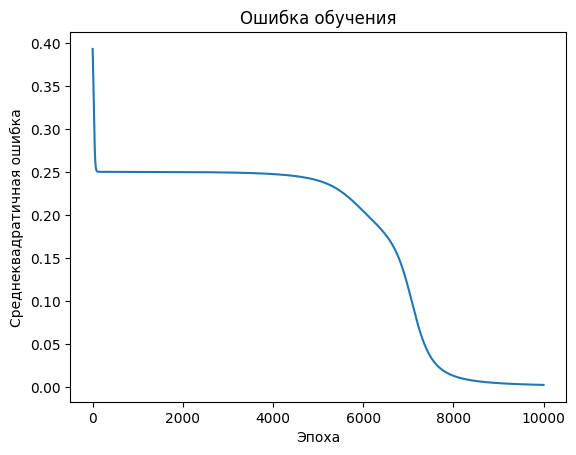

Предсказания на обучающих данных:
[[0.05241825]
 [0.95307541]
 [0.9529897 ]
 [0.06113214]]
Предсказания для новых данных:
[[0.05241825]
 [0.9529897 ]
 [0.95307541]
 [0.06113214]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоида и её производная
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Определение класса нейросети
class NeuralNetwork:
    def __init__(self, input_size, hidden_layer1_size, hidden_layer2_size, output_size):
        # Инициализация размеров слоёв
        self.input_size = input_size
        self.hidden_layer1_size = hidden_layer1_size
        self.hidden_layer2_size = hidden_layer2_size
        self.output_size = output_size

        # Инициализация весов и смещений с случайными значениями
        np.random.seed(42)
        self.weights1 = np.random.randn(self.input_size, self.hidden_layer1_size)
        self.weights2 = np.random.randn(self.hidden_layer1_size, self.hidden_layer2_size)
        self.weights3 = np.random.randn(self.hidden_layer2_size, self.output_size)
        self.bias1 = np.random.randn(1, self.hidden_layer1_size)
        self.bias2 = np.random.randn(1, self.hidden_layer2_size)
        self.bias3 = np.random.randn(1, self.output_size)

    # Прямой проход
    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.a3 = sigmoid(self.z3)

        return self.a3

    # Обратный проход (backpropagation)
    def backward(self, X, y, learning_rate):
        # Ошибка на выходе
        error = y - self.a3
        d_a3 = error * sigmoid_derivative(self.a3)

        # Градиенты для весов и смещений
        d_weights3 = np.dot(self.a2.T, d_a3)
        d_bias3 = np.sum(d_a3, axis=0, keepdims=True)

        d_a2 = np.dot(d_a3, self.weights3.T) * sigmoid_derivative(self.a2)
        d_weights2 = np.dot(self.a1.T, d_a2)
        d_bias2 = np.sum(d_a2, axis=0, keepdims=True)

        d_a1 = np.dot(d_a2, self.weights2.T) * sigmoid_derivative(self.a1)
        d_weights1 = np.dot(X.T, d_a1)
        d_bias1 = np.sum(d_a1, axis=0, keepdims=True)

        # Обновление весов и смещений
        self.weights1 += learning_rate * d_weights1
        self.weights2 += learning_rate * d_weights2
        self.weights3 += learning_rate * d_weights3
        self.bias1 += learning_rate * d_bias1
        self.bias2 += learning_rate * d_bias2
        self.bias3 += learning_rate * d_bias3

    # Обучение нейросети
    def train(self, X, y, learning_rate, epochs):
        errors = []
        for epoch in range(epochs):
            # Прямой проход
            self.forward(X)

            # Обратный проход
            self.backward(X, y, learning_rate)

            # Среднеквадратичная ошибка
            error = y - self.a3
            errors.append(np.mean(np.square(error)))

            if epoch % 1000 == 0:
                print(f"Epoch {epoch} - Error: {errors[-1]}")

        # Визуализация ошибки
        plt.plot(errors)
        plt.title('Ошибка обучения')
        plt.xlabel('Эпоха')
        plt.ylabel('Среднеквадратичная ошибка')
        plt.show()

    # Функция для предсказания на новых данных
    def predict(self, X_new):
        return self.forward(X_new)

# Инициализация данных
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Входные данные (XOR)
y = np.array([[0], [1], [1], [0]])  # Целевые данные

# Создание нейросети
nn = NeuralNetwork(input_size=2, hidden_layer1_size=2, hidden_layer2_size=2, output_size=1)

# Обучение нейросети
nn.train(X, y, learning_rate=0.1, epochs=10000)

# Проверим предсказания после обучения
print("Предсказания на обучающих данных:")
print(nn.predict(X))

# Пример тестирования новых данных
X_test = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])  # Тестируем на примере XOR
predictions = nn.predict(X_test)

print("Предсказания для новых данных:")
print(predictions)